---
# Python 人工智能入门 毕业项目

# 利用机器学习模型预测股票走势

## Yunqing Bao
## 2019年6月30日
---


## 目录
<ul>
<li><a href="#definition">定义</a></li>
<li><a href="#analysis">分析</a></li>
<li><a href="#implementation">实现</a></li>
<li><a href="#result">结果</a></li>
<li><a href="#conclusion">结论</a></li>   
</ul>



---
<a id="definition"></a>
## Ⅰ.定义

在第一节中，你需要对你选定的问题作出定义

### 1.项目概况

在这个部分，你需要用浅显简洁的语句描述这个项目的一个总体概况。以下几个问题可以帮助你理清思路：

- _项目的背景信息是什么？_
- _做这个项目的出发点？_
- _数据集的大概情况是什么？_

### 2.问题陈述

在这个部分，你需要清楚地为你将要解决的问题下定义，这应该包括你解决问题将要使用的策略（任务的大纲）。你同时要详尽地讨论你期望的结果是怎样的。有几个问题是需要考虑的：
- _你是否清楚地定义了这个问题。站在读者的角度，他们能否明白你将要解决的问题是什么。_
- _你是否详尽地阐述了你将会如何解决这个问题？_
- _你期望什么样的结果，读者能明白你期望的这个结果吗？_

### 3.评价指标
在这里，你需要说明你将要用于评价自己的模型和结果的**指标**和**计算方法**。它们需要契合你所选问题的特点及其所在的领域，同时，你要保证他们的合理性。需要考虑的问题：
- _你是否清晰地定义了你所使用的指标和计算方法？_
- _你是否论述了这些指标和计算方法的合理性？_

我们获取了一定时间内的股票大盘数据。 
通过这些大盘数据，我们希望预测一支股票的走势。
根据其过去的涨跌走势，预测出其未来的涨跌走势情况。

数据集中包含了交易的日期、当天的最高与最低指数，收盘指数和每天的交易额
数据集中还包含了CHG与CHGpct指数（显示每天股表指数的涨跌和相应的百分比）

通过这些数据，我希望能够做到预测一段时间内股票的走势，股票指数所能达到的最高点与最低点。
读者们为了利益的最大化，将会被期望在预测指数最低点当天买入，在预测指数最高点当天卖出。

为了评价预测模型的结果好坏，我们将一部分的数据集当作训练集，另一部分的数据集当作测试集。
将从训练集中得到的预测模型放入测试集中进行检验，得出预测结果的准确率、精确率和召回率，
画出ROC与PR曲线，得出AUC值（ROC曲线所围面积）
准确率帮助我们判断模型整体预测能力的好坏。
精确率帮助我们判断模型带来高收益的结果是否可靠。
召回率帮助我们判断模型是否能比较好的预测出所有能得出高收益的操作。
ROC曲线能直观的表示模型对收益的预测能力。AUC值是ROC所围的面积，越大则代表模型预测能力越好。
PR曲线可以直观的将精确率和召回率显示在一张图上。
用这些指标评估模型的性能是比较全面的。

---
<a id="analysis"></a>
## Ⅱ.分析

在第二节，你将对数据进行分析与整理，来进一步认识数据。

### 1.数据的探索
在这一部分，你需要探索你将要使用的数据。数据可以是若干个数据集，或者输入数据/文件，甚至可以是一个设定环境。不过在本项目中，我们已经给出了数据集，因此，你需要详尽地描述数据的类型。如果可以的话，你需要展示数据的一些统计量和基本信息（例如输入的特征（features)，输入里与定义相关的特性）。你还要说明数据中的任何需要被关注的异常或有趣的性质（例如需要做变换的特征，离群值等等）。你需要考虑：
- _如果你使用了数据集，你要详尽地讨论了你所使用数据集的某些特征，并且为阅读者呈现一个直观的样本_
- _如果你使用了数据集，你要计算并描述了它们的统计量，并对其中与你问题相关的地方进行讨论_
- _数据集或输入中是否存在异常、缺陷或其他特性？你为什么认为他们是异常？给出佐证你观点的理由(例如分类变量的处理，缺失数据，离群值等）_

### 2.探索性可视化
在这一部分，你需要对数据的特征或特性进行概括性或提取性的可视化。这个可视化的过程应该要适应你所使用的数据。就你为何使用这个形式的可视化，以及这个可视化过程为什么是有意义的，进行一定的讨论。你需要考虑的问题：
- _你是否对数据中与问题有关的特性进行了可视化？_
- _你对可视化结果进行详尽的分析和讨论了吗？_
- _绘图的坐标轴，标题，基准面是不是清晰定义了？_

### 3.算法和技术
在这一部分，你需要讨论你解决问题时用到的算法和技术。你需要根据问题的特性和所属领域来论述使用这些方法的合理性。你需要考虑：
- _你所使用的算法，包括用到的变量/参数都清晰地说明了吗？_
- _你是否已经详尽地描述并讨论了使用这些技术的合理性？_

> **提示**：*不应* 在每个 notebook 框 (cell) 中进行太多操作。可以自由创建框，来进行数据探索。在这个项目中，可以在初始 notebook 中进行大量探索性操作。不要求对其进行组织，但请务必仔细阅读备注，理解每个代码框的用途。完成分析之后，你可以创建 notebook 副本，在其中去除多余数据，组织好你的每一步分析，从而形成信息连贯、结构紧密的报告。

In [12]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from patsy import dmatrices
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing, svm
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
import math
import datetime
%matplotlib inline

df = pd.read_csv('data.csv',index_col= 0)
df.head()

,tradeDate,closeIndex,highestIndex,lowestIndex,turnoverVol,CHG,CHGPct
0,2006-03-01,1056.62,1057.69,1049.64,1942573000,3.61,0.003428
1,2006-03-02,1038.67,1056.05,1034.68,2487786100,-17.95,-0.016988
2,2006-03-03,1041.68,1043.42,1029.56,2120053900,3.01,0.002898
3,2006-03-06,1038.87,1044.42,1036.11,1787096300,-2.81,-0.002698
4,2006-03-07,1014.97,1037.98,1013.14,1933651600,-23.90,-0.023006


In [13]:
df.corr()

,closeIndex,highestIndex,lowestIndex,turnoverVol,CHG,CHGPct
closeIndex,1.000000,0.999167,0.999206,0.152082,0.021975,0.008433
highestIndex,0.999167,1.000000,0.998993,0.152739,-0.010796,-0.021710
lowestIndex,0.999206,0.998993,1.000000,0.147516,-0.003346,-0.016771
turnoverVol,0.152082,0.152739,0.147516,1.000000,0.103710,0.109801
CHG,0.021975,-0.010796,-0.003346,0.103710,1.000000,0.950750
CHGPct,0.008433,-0.021710,-0.016771,0.109801,0.950750,1.000000


In [14]:
df.describe()

,closeIndex,highestIndex,lowestIndex,turnoverVol,CHG,CHGPct
count,2187.000000,2187.000000,2187.000000,2.187000e+03,2187.000000,2187.000000
mean,2787.469758,2816.014321,2752.490402,6.939017e+09,1.152186,0.000732
std,897.538722,910.123885,881.555628,5.389863e+09,58.216027,0.018595
min,1004.340000,1010.910000,999.930000,1.134803e+09,-391.860000,-0.092400
25%,2287.135000,2307.990000,2259.585000,3.998628e+09,-21.330000,-0.008226
50%,2608.570000,2628.700000,2584.760000,5.794680e+09,2.900000,0.001100
75%,3222.340000,3253.935000,3178.845000,8.159082e+09,27.075000,0.010603
max,5877.200000,5891.720000,5815.610000,6.328746e+10,378.180000,0.093418


**(你的回答)**
一共有2187组数据，没有缺失值。
tradeDate表示交易的日期。
closeindex表示每日的收盘指数。
highestindex和lowestindex表示每日的最高和最低股票指数。
turnoverVol表示每天的交易额。
CHG和CHGPct表示每天股票指数的涨跌幅度和相应的百分比。

CHG的平均值为1.152,表示从2006年至2015年2月股票指数总体上涨
CHG的标准差值比较大，表示股票指数的波动性较强。


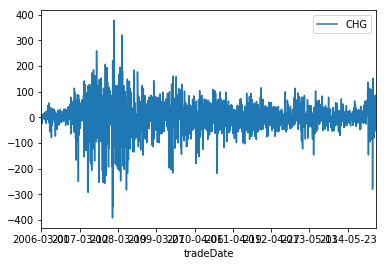

In [15]:
df.plot(x = 'tradeDate',y = 'CHG')

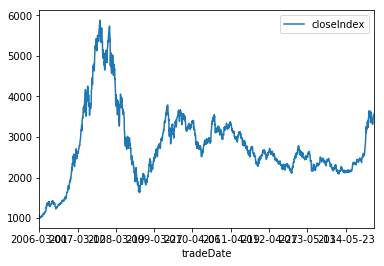

In [16]:
df.plot(x = 'tradeDate',y = 'closeIndex')

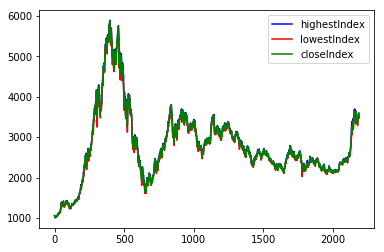

In [17]:
plt.plot(df['highestIndex'],color='blue',label = 'highestIndex')
plt.plot(df['lowestIndex'],color='red', label = 'lowestIndex')
plt.plot(df['closeIndex'],color='green', label = 'closeIndex')
plt.legend()

In [8]:
从图中可以看出，股票的收盘指数和每天的最高指数、最低指数的变化趋势是一致的。
在一天之内指数的变动程度要比股票指数随不同日期变化的程度小的多。
从预测股票走势的角度来看，highestIndex,lowestIndex与closeIndex都可以作为预测的目标，他们都可以比较好的反应股票的走势。

SyntaxError: invalid character in identifier (<ipython-input-8-e33b83443f2b>, line 1)

---
<a id="implementation"></a>
## Ⅲ. 实现
在第三节中，你需要引入自己选定的模型，并使用数据集中的数据去训练兵优化它，使得最终的模型能够得到想要的结果

### 1.数据预处理
在这一部分， 你需要清晰记录你所有必要的数据预处理步骤。在前一个部分所描述的数据的异常或特性在这一部分需要被更正和处理。需要考虑的问题有：
- _如果你选择的算法需要进行特征选取或特征变换，你对此进行记录和描述了吗？_
- _**数据的探索**这一部分中提及的异常和特性是否被更正了，对此进行记录和描述了吗？_
- _如果你认为不需要进行预处理，你解释个中原因了吗？_

### 2.执行过程
在这一部分， 你需要描述你所建立的模型在给定数据上执行过程。模型的执行过程，以及过程中遇到的困难的描述应该清晰明了地记录和描述。需要考虑的问题：
- _你所用到的算法和技术执行的方式是否清晰记录了？_
- _在运用上面所提及的技术及指标的执行过程中是否遇到了困难，是否需要作出改动来得到想要的结果？_


### 3.完善
在这一部分，你需要描述你对原有的算法和技术完善的过程。例如调整模型的参数以达到更好的结果的过程应该有所记录。你需要记录最初和最终的模型，以及过程中有代表性意义的结果。你需要考虑的问题：
- _初始结果是否清晰记录了？_
- _完善的过程是否清晰记录了，其中使用了什么技术？_
- _完善过程中的结果以及最终结果是否清晰记录了？_

In [68]:
#将closeIndex作为预测对象
df_new = df.drop(df.columns[[0,5,6]],axis = 1)
print(df_new)
X_data = df_new.drop('closeIndex', axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(
                 X_data, df_new['closeIndex'], test_size=0.2, random_state=0)
lm_full = LinearRegression()
lm_full.fit(X_train, y_train)
lm_full.score(X_test, y_test)

      closeIndex  highestIndex  lowestIndex  turnoverVol  intercept
0        1056.62       1057.69      1049.64   1942573000          1
1        1038.67       1056.05      1034.68   2487786100          1
2        1041.68       1043.42      1029.56   2120053900          1
3        1038.87       1044.42      1036.11   1787096300          1
4        1014.97       1037.98      1013.14   1933651600          1
5        1009.27       1014.97       999.93   1746305500          1
6        1004.34       1010.91      1002.20   1273509900          1
7        1008.90       1011.76      1004.69   1188798300          1
8        1019.86       1020.88      1008.51   1176591100          1
9        1018.27       1021.65      1012.11   1134803000          1
10       1028.96       1028.97      1017.08   1484206800          1
11       1027.62       1029.81      1025.52   1478433900          1
12       1024.02       1029.56      1021.08   1500192400          1
13       1037.66       1037.91      1019.65   15

0.9989849935685887

In [66]:
df['intercept'] = 1
lm = sm.OLS(df['closeIndex'],df[['intercept','CHG','CHGPct']])
result = lm.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             closeIndex   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.297
Date:                Sun, 21 Jul 2019   Prob (F-statistic):              0.101
Time:                        19:45:36   Log-Likelihood:                -17971.
No. Observations:                2187   AIC:                         3.595e+04
Df Residuals:                    2184   BIC:                         3.597e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2789.4726     19.227    145.082      0.000    2751.768    2827.178
CHG            2.2397      1.063      2.107      0.035       0.155       4.325
CHGPct     -6259.6110   3328.724     -1.880      0.060   -1.28e+04     268.185
==============================================================================
Omnibus:                      311.886   Durbin-Watson:                   0.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              524.495
Skew:                           0.941   Prob(JB):                    1.28e-114
Kurtosis:                       4.488   Cond. No.                     1.01e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:
df['intercept'] = 1
lm = sm.OLS(df['closeIndex'],df[['intercept','turnoverVol','CHG','CHGPct']])
result = lm.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             closeIndex   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     18.85
Date:                Sun, 21 Jul 2019   Prob (F-statistic):           4.51e-12
Time:                        19:46:45   Log-Likelihood:                -17946.
No. Observations:                2187   AIC:                         3.590e+04
Df Residuals:                    2183   BIC:                         3.592e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept    2613.1738     30.993     84.315      0.000    2552.395    2673.953
turnoverVol   2.55e-08   3.54e-09      7.202      0.000    1.86e-08    3.24e-08
CHG             2.2565      1.051      2.147      0.032       0.195       4.318
CHGPct      -7121.0418   3292.800     -2.163      0.031   -1.36e+04    -663.691
==============================================================================
Omnibus:                      405.067   Durbin-Watson:                   0.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              766.491
Skew:                           1.125   Prob(JB):                    3.62e-167
Kurtosis:                       4.830   Cond. No.                     1.53e+12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.53e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [71]:
#去除NaN值
forecast_out = int(math.ceil(0.01 * len(df)))
#预测forecast_out天后的

df_new = df.copy()
df_new['lable'] = df_new['closeIndex'].shift(-forecast_out)
print(df_new)

print(df.shape)
print(df_new.shape)
df_new.drop('tradeDate',axis = 1,inplace = True)
X = np.array(df_new.drop(['lable'], axis = 1))

X_lately = X[-forecast_out:]
X = X[:-forecast_out]

df_new.dropna(inplace = True)
print(df_new.shape)
print(X)
print(X_lately)
y = np.array(df_new['lable'])

       tradeDate  closeIndex  highestIndex  lowestIndex  turnoverVol     CHG  \
0     2006-03-01     1056.62       1057.69      1049.64   1942573000    3.61   
1     2006-03-02     1038.67       1056.05      1034.68   2487786100  -17.95   
2     2006-03-03     1041.68       1043.42      1029.56   2120053900    3.01   
3     2006-03-06     1038.87       1044.42      1036.11   1787096300   -2.81   
4     2006-03-07     1014.97       1037.98      1013.14   1933651600  -23.90   
5     2006-03-08     1009.27       1014.97       999.93   1746305500   -5.70   
6     2006-03-09     1004.34       1010.91      1002.20   1273509900   -4.93   
7     2006-03-10     1008.90       1011.76      1004.69   1188798300    4.56   
8     2006-03-13     1019.86       1020.88      1008.51   1176591100   10.96   
9     2006-03-14     1018.27       1021.65      1012.11   1134803000   -1.59   
10    2006-03-15     1028.96       1028.97      1017.08   1484206800   10.69   
11    2006-03-16     1027.62       1029.

**(你的回答)**
若是去掉交易额、CHG指数等变量，还是能够很好的预测股票收盘指数，收盘指数closeindex约99.9%与highestindex和lowestindex有关。

在线性模型中，closeindex与CHG,CHGPcty这三个变量的R平方系数只有0.002,说明关系不大，可以忽略它们的影响。
在加入turnoverVol变量后，R平方系数增大为0.025，说明turnoverVol对收盘指数还是有一定影响的，不能被忽视。

去掉空值后，可以预测出forecast_out天后的closeindex值，用于预测股票指数的走势。

---
<a id="result"></a>
## IV. 结果
经过前面的几步，你已经训练好了自己的模型并计算出了一些结果。这一节，你需要对这些进行讨论与分析

### 模型的评价与验证
在这一部分，你需要对你得出的最终模型的各种技术质量进行详尽的评价。最终模型是怎么得出来的，为什么它会被选为最佳需要清晰地描述。你也需要对模型和结果可靠性作出验证分析，譬如对输入数据或环境的一些操控是否会对结果产生影响（敏感性分析sensitivity analysis）。一些需要考虑的问题：
- _最终的模型是否合理，跟期待的结果是否一致？最后的各种参数是否合理？_
- _模型是否对于这个问题是否足够稳健可靠？训练数据或输入的一些微小的改变是否会极大影响结果？（鲁棒性）_
- _这个模型得出的结果是否可信？_



In [72]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)
clf = LinearRegression()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print('accuracy = ',accuracy)

y_pred = clf.predict(X_lately)

accuracy =  0.8774790395973788


In [73]:
y_pred = clf.predict(X_lately)

print(y_pred,accuracy,forecast_out)

'''
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
print(last_date,last_unix)
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

'''

last_date = df.iloc[-1].name
x_day = np.linspace(1,forecast_out,forecast_out)



a = np.array(x_day)
b = np.array(y_pred)
b = np.append(b,np.array(y_pred))
predict = dict(zip(a,b))
print('predict:{A}'.format(A=predict))

[3704.12413729 3745.88364855 3723.36122753 3722.3074361  3609.8148701
 3541.8254657  3528.81915143 3407.78664394 3563.20547538 3498.31023036
 3559.4931997  3396.1441754  3445.65567424 3485.2638197  3477.17150368
 3483.95762087 3583.72504023 3553.11408472 3574.29142367 3520.97938751
 3720.48348517 3666.29283829] 0.8774790395973788 22
predict:{1.0: 3704.124137294976, 2.0: 3745.8836485506267, 3.0: 3723.3612275312043, 4.0: 3722.307436096524, 5.0: 3609.8148700961638, 6.0: 3541.8254656967856, 7.0: 3528.8191514263995, 8.0: 3407.786643939709, 9.0: 3563.2054753762486, 10.0: 3498.3102303621, 11.0: 3559.4931997020717, 12.0: 3396.144175401781, 13.0: 3445.655674239806, 14.0: 3485.2638196999706, 15.0: 3477.171503682047, 16.0: 3483.9576208694443, 17.0: 3583.7250402308655, 18.0: 3553.1140847167885, 19.0: 3574.2914236671413, 20.0: 3520.9793875118803, 21.0: 3720.483485166732, 22.0: 3666.2928382937525}


**(你的回答)**
模型主要从highest、lowestindex和closeindex三个数据进行预测，得出了未来22天的股票指数的走势。
由于预测所用的三个数据与收盘指数closeindex的关联性很高，并且预测的精确度accuracy达到了0.877,比较高
说明股票的走势的结果还是比较可信的。


---
<a id="conclusion"></a>
## V. 项目结论
这一节中，我们将对整个项目做出总结


### 结果可视化
在这一部分，你需要用可视化的方式展示项目中需要强调的重要技术特性。至于什么形式，你可以自由把握，但需要表达出一个关于这个项目重要的结论和特点，并对此作出讨论。一些需要考虑的：
- _你是否对一个与问题，数据集，输入数据，或结果相关的，重要的技术特性进行了可视化？_
- _可视化结果是否详尽的分析讨论了？_
- _绘图的坐标轴，标题，基准面是不是清晰定义了？_


### 对项目的思考
在这一部分，你需要从头到尾总结一下整个问题的解决方案，讨论其中你认为有趣或困难的地方。从整体来反思一下整个项目，确保自己对整个流程是明确掌握的。需要考虑：
- _你是否详尽总结了项目的整个流程？_
- _项目里有哪些比较有意思的地方？_
- _项目里有哪些比较困难的地方？_
- _最终模型和结果是否符合你对这个问题的期望？它可以在通用的场景下解决这些类型的问题吗？_


### 需要作出的改进
在这一部分，你需要讨论你可以怎么样去完善你执行流程中的某一方面。例如考虑一下你的操作的方法是否可以进一步推广，泛化，有没有需要作出变更的地方。你并不需要确实作出这些改进，不过你应能够讨论这些改进可能对结果的影响，并与现有结果进行比较。一些需要考虑的问题：
- _是否可以有算法和技术层面的进一步的完善？_
- _是否有一些你了解到，但是你还没能够实践的算法和技术？_




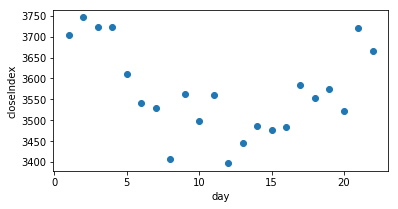

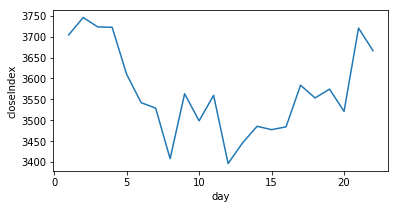

In [63]:
#画出未来有22天中收盘指数的预期变化
plt.figure(figsize=(6, 6.5))
plt.subplot(211)
plt.scatter(x_day,y_pred)
plt.xlabel('day')
plt.ylabel('closeIndex')           
plt.show()

plt.figure(figsize=(6, 6.5))
plt.subplot(212)
plt.plot(x_day,y_pred)
plt.xlabel('day')
plt.ylabel('closeIndex')           
plt.show()
# 你可以自由的使用任意数量和任意格式的代码框，但请在最终提交的报告中注意报告的整洁与通顺


**(你的回答)**
画出了收盘指数在未来有22天中的走势，以折线图与散点图的方式。
从图中可以看出，第12天的股票指数最低，而在第12天后第21天的收盘指数最高。
所以应该在第12天买入，21天卖出。

这次模型预测主要用了每天最高与最低的股票指数与交易额去预测未来每天股票的收盘指数。
而CHG指数对closeindex的影响很小，可以不考虑。每天的收盘指数与最高和最低指数的数值是差不多的，这三者的角色也是
基本相同的，所以这次的预测主要还是用交易额与收盘指数去预测未来的股票指数。

但现实中能影响股票的变量是非常多的，单纯数字上的收盘指数和交易额并不足够预测出可靠的股票走势。还有很多诸如政策影响、主力资金流动、股民的信心等等变量会对股票走势产生很大的影响。我们需要更多的数据与变量去做菜更加精确、可靠的预测。

----------
** 在提交之前， 问一下自己... **

- 你所写的项目报告结构对比于这个模板而言足够清晰了没有？
- 每一个部分（尤其**分析**和**方法**）是否清晰，简洁，明了？有没有存在歧义的术语和用语需要进一步说明的？
- 你的目标读者是不是能够明白你的分析，方法和结果？
- 报告里面是否有语法错误或拼写错误？
- 报告里提到的一些外部资料及来源是不是都正确引述或引用了？
- 代码可读性是否良好？必要的注释是否加上了？
- 代码是否可以顺利运行并重现跟报告相似的结果？